In [51]:
import pandas as pd

# Opération 2 = Stats sur les glossateurs du manuscrit. Suivre le mouvement de la confection du manuscrit, combien et quel type de gloses chaque glosateur a écrit. Entre les gloses, quel type est privilegié?

In [52]:
VL41 = pd.read_csv("Glosses_VossLat041_Latin 14087.csv")
VL41

,Lt,Le,Tl,Gm,Gi,Gnorm,folio,line,Lorder,Mg,Temp,Loc,Forme,Sens,grammatical terminology (Schad),Notes divers,Concordance avec Latin 14087
0,INCIPIT LIBER EUTI/GRAMMAT(I)CI CI/DE UERBO,NaN,NaN,++++/de uer[bo] ++++/nus contextor,NaN,NaN,2r,0,NaN,C,T3,P1 en haut à droite,F4,S523,NaN,"contextio, weaving (also fig. of other structu...",NaN
1,cum semper,semper,NaN,NaN,s cũ frequentia,scilicet cum frequentia,2r,1,a,B,T2,P0,F3,S22,NaN,"*cum superfluitate, cum est superflu ?",NaN
2,noues quaestiones,quaestiones,NaN,NaN,novẽ int̃rogaciones,noues interogationes,2r,1,b,B,T2,P0,F3,S22,NaN,NaN,NaN
3,doctorib;,doctoribus,NaN,NaN,p̃ce++++++,preceptoribus,2r,1,c,A,T1,P0,F2,S22,NaN,NaN,Preceptor. doctor ł magifter
4,auditorum,NaN,NaN,NaN,iđ discipulorũ,id est discipulorum,2r,2,a,A,T1,P0,F2,S22,NaN,*+ adiutorum ?,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,**neumes**,NaN,NaN,NaN,inuiolata,NaN,31v,1-3,NaN,NaN,NaN,upper P1,F2,essais de plume,NaN,Sequentia https://www.gregorianum.org/wiki/Inv...,NaN
1084,NaN,tarecogant᷑,NaN,NaN,NaN,NaN,32v,1,NaN,NaN,NaN,P1 left,F2,essais de plume,NaN,NaN,NaN
1085,NaN,PIOY. feci PiεII,NaN,NaN,NaN,NaN,32v,21,NaN,NaN,NaN,P1 left,F3,essais de plume,NaN,NaN,NaN
1086,NaN,ritop,NaN,NaN,NaN,NaN,32v,24,NaN,NaN,NaN,P1 left,F2,essais de plume,NaN,NaN,NaN


In [53]:
VL41["Mg"].value_counts()

A     458
B     341
C     131
3      47
AB     42
m0     21
D       7
E       3
Name: Mg, dtype: int64

In [54]:
VL41[VL41['Mg'] == "T2"]

,Lt,Le,Tl,Gm,Gi,Gnorm,folio,line,Lorder,Mg,Temp,Loc,Forme,Sens,grammatical terminology (Schad),Notes divers,Concordance avec Latin 14087


In [55]:
df = VL41[["folio", "Mg"]] 
#un subset avec Lt=lemmas, Gm = Glosses en marge, Gi= Glosses interlinéaires, folio,
#Mg= MaindeGlossateur, Loc= en marge ou en interligne, Forme = signe, mot, syntagme ou phrase
#Sens = type de glose
df = df.dropna(axis=0)
df.loc[4,'folio'] = '2r'
df.head

<bound method NDFrame.head of      folio Mg
0       2r  C
1       2r  B
2       2r  B
3       2r  A
4       2r  A
...    ... ..
1061   22r  3
1062   22r  3
1063   22r  3
1064   22v  3
1065   22v  3

[1049 rows x 2 columns]>

In [56]:
foliolist = []
for val in df.folio:
    if val not in foliolist:
        foliolist.append(val)
print(len(foliolist), foliolist)

42 ['2r', '2v', '3r', '3v', '4r', '4v', '5r', '5v', '6r', '6v', '7r', '7v', '8r', '8v', '9r', '9v', '10r', '10v', '11r', '11v', '12r', '12v', '21f', '13r', '13v', '14r', '14v', '15r', '15v', '16r', '16v', '17r', '18r', '18v', '19r', '19v', '20r', '20v', '21r', '21v', '22r', '22v']


In [57]:
listdico = [] # make an empty list for all hands in each folio

for folio in foliolist:
    
    sub_df = df.loc[df['folio'] == folio] # a sub data frame with all hand in a folio

    a = sub_df['Mg'].value_counts() # a panda series of the number of each hand occurence
    
    
    folio_hands = dict(a) # change series to dictionary object
    
    listdico.append(folio_hands) # append the dict on the list

newdf = pd.DataFrame(listdico, index=foliolist) # make a df with hands occurences as columns and folios as index
newdf

,B,A,C,m0,AB,3,D,E
2r,33.0,11.0,3.0,1.0,NaN,NaN,NaN,NaN
2v,22.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN
3r,24.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN
3v,18.0,8.0,16.0,7.0,NaN,NaN,NaN,NaN
4r,38.0,4.0,10.0,1.0,NaN,NaN,NaN,NaN
4v,15.0,7.0,17.0,6.0,NaN,NaN,NaN,NaN
5r,5.0,18.0,21.0,2.0,NaN,NaN,NaN,NaN
5v,12.0,7.0,4.0,1.0,NaN,NaN,NaN,NaN
6r,3.0,28.0,17.0,1.0,8.0,6.0,NaN,NaN
6v,16.0,13.0,9.0,NaN,7.0,NaN,NaN,NaN


In [58]:
newdf = newdf.fillna(0) # replace NaN value (when a hand does not write on a folio) by zero
newdf

,B,A,C,m0,AB,3,D,E
2r,33.0,11.0,3.0,1.0,0.0,0.0,0.0,0.0
2v,22.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0
3r,24.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3v,18.0,8.0,16.0,7.0,0.0,0.0,0.0,0.0
4r,38.0,4.0,10.0,1.0,0.0,0.0,0.0,0.0
4v,15.0,7.0,17.0,6.0,0.0,0.0,0.0,0.0
5r,5.0,18.0,21.0,2.0,0.0,0.0,0.0,0.0
5v,12.0,7.0,4.0,1.0,0.0,0.0,0.0,0.0
6r,3.0,28.0,17.0,1.0,8.0,6.0,0.0,0.0
6v,16.0,13.0,9.0,0.0,7.0,0.0,0.0,0.0


In [59]:
import matplotlib.pyplot as plt

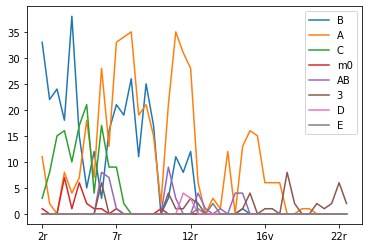

In [60]:
ax = plt.gca()
for hand in newdf.columns: # for each hand 
    # plot a line using folio as x_value and hand as y_value
    newdf.plot(kind='line',use_index=True, y=str(hand),ax=ax)
    # different color are automaticaly given

plt.show()